# Data exploration

## 15-per-hour-seattle

In [197]:
import pandas as pd

comments_df = pd.read_csv('15-per-hour-seattle/comments.csv')
pvotes_df = pd.read_csv('15-per-hour-seattle/participants-votes.csv')
stathist_df = pd.read_csv('15-per-hour-seattle/stats-history.csv')
summary = pd.read_csv('15-per-hour-seattle/summary.csv', index_col=0).squeeze()
votes_df = pd.read_csv('15-per-hour-seattle/votes.csv')

In [198]:
print(f'The discussion topic is: {summary.loc['conversation-description']}')
summary

The discussion topic is: How do you think the new minimum wage law will affect Seattle? Will it be for the better or for the worse? Why?


topic
url                                                      https://pol.is/2demo
views                                                                    6184
voters                                                                    339
voters-in-conv                                                            339
commenters                                                                 33
comments                                                                   54
groups                                                                      2
conversation-description    How do you think the new minimum wage law will...
Name: $15/hour, dtype: object

In [199]:
print(f'comments_df shape: {comments_df.shape}')
comments_df.head()

comments_df shape: (54, 8)


,timestamp,datetime,comment-id,author-id,agrees,disagrees,moderated,comment-body
0,1542406176584,Sat Nov 17 05:09:36 WIB 2018,53,6172,1,0,0,Not sure I believe any of this...
1,1403067224363,Wed Jun 18 11:53:44 WIB 2014,48,215,38,18,1,"Businesses, small or large, shouldn't be able ..."
2,1403058993627,Wed Jun 18 09:36:33 WIB 2014,36,85,53,30,1,It's just going to speed up the adoption of ro...
3,1403058892294,Wed Jun 18 09:34:52 WIB 2014,20,33,43,46,1,Reactionary liberal trash. Doesn't solve the p...
4,1403054231140,Wed Jun 18 08:17:11 WIB 2014,4,0,60,25,1,While the arguments for the raise in the minim...


In [200]:
# Comments moderated out have a value of 0 in the moderated column
print(f'Comments moderated out: {comments_df[comments_df['moderated']<1].shape[0]}')
comments_in_index = comments_df[comments_df['moderated']>0].index.tolist()

Comments moderated out: 24


In [201]:
print(f'participants-votes: {pvotes_df.shape}')
pvotes_df.head()

participants-votes: (339, 60)


,participant,group-id,n-comments,n-votes,n-agree,n-disagree,0,1,2,3,...,44,45,46,47,48,49,50,51,52,53
0,0,0.0,13,13,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,13,8,4,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,0,14,8,6,1.0,-1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,0,16,9,7,1.0,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,0,20,4,10,-1.0,0.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
print(f'stathist_df shape: {stathist_df.shape}')
stathist_df.head()

stathist_df shape: (9233, 5)


,n-votes,n-comments,n-visitors,n-voters,n-commenters
0,0,0,1,0,0
1,0,1,1,0,1
2,1,1,1,1,1
3,1,2,1,1,2
4,2,2,1,2,2


In [203]:
print(f'votes_df shape: {votes_df.shape}')
votes_df.head()

votes_df shape: (2995, 5)


,timestamp,datetime,comment-id,voter-id,vote
0,1403054214196,Wed Jun 18 08:16:54 WIB 2014,0,0,0
1,1403057082753,Wed Jun 18 09:04:42 WIB 2014,0,1,1
2,1403058957160,Wed Jun 18 09:35:57 WIB 2014,0,3,1
3,1403058913597,Wed Jun 18 09:35:13 WIB 2014,0,4,1
4,1403058827830,Wed Jun 18 09:33:47 WIB 2014,0,5,-1


### Exp 1

#### Create participant-comment matrix (pc-matrix), where the index (row identifiers) is the participant id and the columns are commen id

In [204]:
pvotes_df = pvotes_df.set_index('participant')
comments_df = comments_df.set_index('comment-id')

In [205]:
pvotes_df.head()

,group-id,n-comments,n-votes,n-agree,n-disagree,0,1,2,3,4,...,44,45,46,47,48,49,50,51,52,53
participant,,,,,,,,,,,,,,,,,,,,,
0,0.0,13,13,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0,13,8,4,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0,14,8,6,1.0,-1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0,16,9,7,1.0,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0,20,4,10,-1.0,0.0,-1.0,-1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
# Polis opinion grouping algorithm disregards participants that cast less than 7 votes. 
# See: https://github.com/compdemocracy/notebooks/blob/master/American%20Assembly%20BG%20analysis%20v0.8%20subconversation%2C%20every%20vote.ipynb
print(f'There are {pvotes_df[pd.isnull(pvotes_df['group-id'])].shape[0]} participants that casted less than 7 votes.')

# In our exercise, we will have to disregard them as well.
pvcounted_df = pvotes_df[pvotes_df['n-votes'] >= 7]
print(f'There are {pvcounted_df.shape[0]} participants left in the analysis.')

There are 201 participants that casted less than 7 votes.
There are 138 participants left in the analysis.


In [207]:
metadata_cols = ['group-id', 'n-comments', 'n-votes', 'n-agree', 'n-disagree']
metadata = pvcounted_df[metadata_cols]
metadata.head()

,group-id,n-comments,n-votes,n-agree,n-disagree
participant,,,,,
0,0.0,13,13,0,0
1,1.0,0,13,8,4
3,1.0,0,14,8,6
4,1.0,0,16,9,7
5,0.0,0,20,4,10


In [208]:
pc_matrix = pvcounted_df.drop(columns=metadata_cols)
pc_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
participant,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,-1.0,NaN,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,-1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
# There are 24 comments moderated out; we should take them out of the analysis as well by keeping only the comments in comments_in_index
pc_matrix = pc_matrix[[str(i) for i in comments_in_index]]
pc_matrix.shape

(138, 30)

In [210]:
print(f'After taking out null participants and out-moderated comments, there are {pc_matrix.notna().sum().sum()} valid votes left in the participant-comment matrix.')
print(f'There are {pc_matrix.isnull().sum().sum()} null votes in the participant-comment matrix')

After taking out null participants and out-moderated comments, there are 1500 valid votes left in the participant-comment matrix.
There are 2640 null votes in the participant-comment matrix


In [211]:
# We fill the null votes with 0s. 
pc_matrix = pc_matrix.fillna(0)
print(f'After filling the null votes with 0s, there are {pc_matrix.isnull().sum().sum()} null votes in the participant-comment matrix')

After filling the null votes with 0s, there are 0 null votes in the participant-comment matrix


In [212]:
# Overall stats
melted = pc_matrix.melt()
by_type = melted['value'].value_counts()
total_possible_votes = melted.shape[0]
total_agree_votes = by_type[1.0]
total_disagree_votes = by_type[-1.0]
total_without_votes = by_type[0.0]

print(f'Total possible votes: {total_possible_votes}')
print(f'Total agree votes: {total_agree_votes}')
print(f'Total disagree votes: {total_disagree_votes}')
print(f'Total without votes: {total_without_votes}')


Total possible votes: 4140
Total agree votes: 739
Total disagree votes: 452
Total without votes: 2949


#### Cluster participants to find opinion groups

From the website of Polis, they seem to suggest their opinion grouping is solely based on k-means clustering. However, reading their code on github, they seeem to construct graphs using k-nearnest neighbor before feeding them to the leiden community detection algorithm. 

##### Raw k-means clustering

In [191]:
# Perform k-means clustering on pc_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the number of clusters (e.g., 3)
range_n_clusters = range(2,7)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    # fit_predict() directly returns the labels
    # fit() doesn't return the labels; one has to call kmeans.labels_ to get the labels
    cluster_labels = kmeans.fit_predict(pc_matrix)

    silhouette_avg = silhouette_score(pc_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}')

For n_clusters = 2, the silhouette score is: 0.13042203502897762
For n_clusters = 3, the silhouette score is: 0.09427426336921861
For n_clusters = 4, the silhouette score is: 0.09307315972567451
For n_clusters = 5, the silhouette score is: 0.08645949449093153
For n_clusters = 6, the silhouette score is: 0.09279271185445895


In [192]:
# Given the above silhouette scores, the number of clusters should be 2.
n_clusters = 2

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')  # explicitly set n_init

# Fit the model to the data
kmeans.fit(pc_matrix)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the metadata DataFrame
metadata.loc[:, 'cluster'] = cluster_labels

print(metadata.head())

             group-id  n-comments  n-votes  n-agree  n-disagree  cluster
participant                                                             
0                 0.0          13       13        0           0        1
1                 1.0           0       13        8           4        1
3                 1.0           0       14        8           6        1
4                 1.0           0       16        9           7        1
5                 0.0           0       20        4          10        0


/var/folders/yt/xv1c41h15flg31_2xgl1rnj00000gn/T/ipykernel_21760/307804098.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata.loc[:, 'cluster'] = cluster_labels


In [193]:
# Compare the group-id (given by the original source) with the cluster (calculated by us)
metadata.loc[:, 'cluster'] = metadata['cluster'].astype(float)

diff_clustering = metadata[metadata['group-id'] != metadata['cluster']]
print(f'There are {diff_clustering.shape[0]} participants that were assigned to a different cluster than the one they were assigned to by the original source.')
diff_pindex = diff_clustering.index.tolist()

There are 35 participants that were assigned to a different cluster than the one they were assigned to by the original source.


In [194]:
diff_pindex

[0,
 8,
 12,
 20,
 32,
 34,
 68,
 74,
 102,
 5806,
 6053,
 6056,
 6068,
 6083,
 6085,
 6128,
 6154,
 6160,
 6162,
 6165,
 6180,
 21,
 5986,
 6078,
 6082,
 6133,
 40,
 6123,
 6156,
 6171,
 6175,
 6176,
 46,
 6101,
 6169]

##### K-nearnest neighbor then leiden community detection

For n_neighbors = 1, average degree = 1.81, density = 0.0132
For n_neighbors = 2, average degree = 3.36, density = 0.0245
For n_neighbors = 3, average degree = 5.06, density = 0.0369
For n_neighbors = 4, average degree = 6.75, density = 0.0493
For n_neighbors = 5, average degree = 8.26, density = 0.0603
For n_neighbors = 6, average degree = 9.91, density = 0.0724
For n_neighbors = 7, average degree = 11.58, density = 0.0845
For n_neighbors = 8, average degree = 13.20, density = 0.0964
For n_neighbors = 9, average degree = 14.70, density = 0.1073
For n_neighbors = 10, average degree = 16.25, density = 0.1186
For n_neighbors = 11, average degree = 17.81, density = 0.1300
For n_neighbors = 12, average degree = 19.38, density = 0.1414
For n_neighbors = 13, average degree = 20.93, density = 0.1528
For n_neighbors = 14, average degree = 22.57, density = 0.1647
For n_neighbors = 15, average degree = 24.09, density = 0.1758
For n_neighbors = 16, average degree = 25.62, density = 0.1870
For n_n

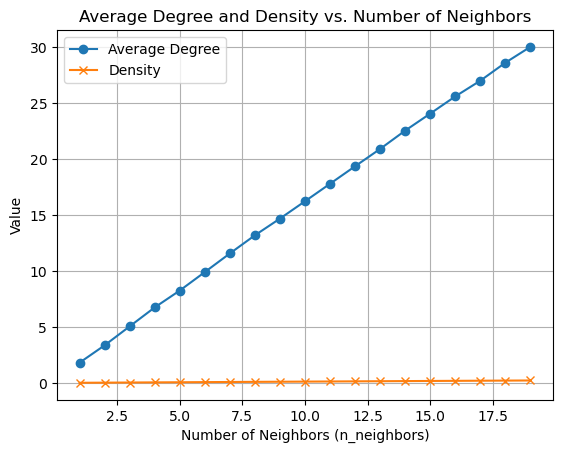

In [218]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
import scipy.sparse
import networkx as nx
import matplotlib.pyplot as plt

range_n_neighbors = range(1, 20)  # Test k from 1 to 10
avg_degrees = []
densities = []

for n_neighbors in range_n_neighbors:
    # Construct the k-NN graph
    A = kneighbors_graph(pc_matrix, n_neighbors=n_neighbors, mode='connectivity', include_self=False)

    # Convert to a sparse matrix
    A = scipy.sparse.csr_matrix(A)

    # Convert the sparse matrix to a NetworkX graph
    G = nx.from_scipy_sparse_array(A)

    # Calculate the average degree
    degrees = [d for n, d in G.degree()]
    avg_degree = np.mean(degrees)
    avg_degrees.append(avg_degree)

    # Calculate the density
    n = G.number_of_nodes()
    m = G.number_of_edges()
    density = 2 * m / (n * (n - 1))  # For undirected graphs
    densities.append(density)

    print(f"For n_neighbors = {n_neighbors}, average degree = {avg_degree:.2f}, density = {density:.4f}")

# Plot the average degree vs. n_neighbors
plt.plot(range_n_neighbors, avg_degrees, marker='o', label='Average Degree')
plt.plot(range_n_neighbors, densities, marker='x', label='Density')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Value")
plt.title("Average Degree and Density vs. Number of Neighbors")
plt.grid(True)
plt.legend()
plt.show()

## American Assembly

In [54]:
import pandas as pd

comments_df = pd.read_csv('american-assembly.bowling-green/comments.csv')
pvotes_df = pd.read_csv('american-assembly.bowling-green/participants-votes.csv')
stathist_df = pd.read_csv('american-assembly.bowling-green/stats-history.csv')
summary = pd.read_csv('american-assembly.bowling-green/summary.csv', index_col=0).squeeze()
votes_df = pd.read_csv('american-assembly.bowling-green/votes.csv')

## NH-democratic-ai-2

In [195]:
comments_df = pd.read_csv('NH-democratic-ai-2/comments.csv')
pvotes_df = pd.read_csv('NH-democratic-ai-2/participant-votes.csv')
summary = pd.read_csv('NH-democratic-ai-2/summary.csv', index_col=0).squeeze()
votes_df = pd.read_csv('NH-democratic-ai-2/votes.csv')
comgroup_df = pd.read_csv('NH-democratic-ai-2/comment-groups.csv')
comgroup_df

,comment-id,comment,total-votes,total-agrees,total-disagrees,total-passes,group-a-votes,group-a-agrees,group-a-disagrees,group-a-passes,group-b-votes,group-b-agrees,group-b-disagrees,group-b-passes,group-c-votes,group-c-agrees,group-c-disagrees,group-c-passes
0,1,"Even if AI-generated works are legal, there’s ...",27,19,6,2,19,16,1,2,5,3,2,0,3,0,3,0
1,2,"AI-generated content will flood the internet, ...",27,13,11,3,19,9,7,3,5,1,4,0,3,3,0,0
2,3,"If AI replaces human artists, it will kill the...",8,3,5,0,4,2,2,0,3,1,2,0,1,0,1,0
3,4,Small creators will lose their livelihoods if ...,24,12,8,4,17,10,5,2,5,2,2,1,2,0,1,1
4,5,Big AI companies are profiting off artists’ wo...,22,15,4,3,15,12,0,3,4,0,4,0,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Bernie for president,5,2,0,3,4,2,0,2,1,0,0,1,0,0,0,0
57,58,"It's impractical to add copyright laws to AI, ...",3,2,0,1,2,1,0,1,1,1,0,0,0,0,0,0
58,59,We need a balanced approach that does not guar...,2,2,0,0,1,1,0,0,1,1,0,0,0,0,0,0
59,60,"Soon, pretty much everything is at least part-...",3,1,1,1,2,1,0,1,1,0,1,0,0,0,0,0
